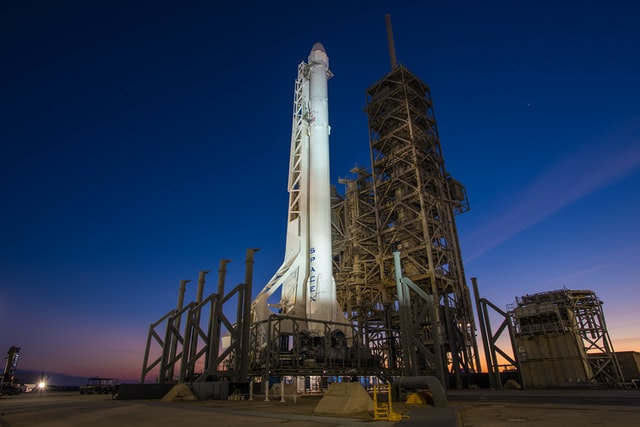

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
sns.set()


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# *Content of the page*

* <a id ="Loading Data" href="#Loading-Data">Loading Data</a> 
* <a id ="Having a first look" href="#Having-a-first-look">Having a first look</a>
* <a id ="Fixing initial data issues" href="#Fixing-initial-data-issues">Fixing initial data issues</a>
    * <a id ="Removing Unwanted columns" href="#Removing-Unwanted-columns">Removing Unwanted columns</a>
    * <a id ="Extracting values from date column" href="#Extracting-values-from-date-column">Extracting values from date column</a>
    * <a id ="Deriving Country name from location" href="#Deriving-Country-name-from-location">Deriving Country name from location</a>
* <a id ="EDA using seaborn and matplotlib" href="#EDA-using-seaborn-and-matplotlib">EDA using seaborn and matplotlib</a>
    * <a id ="How many missions were successful and failure since 1957 to present?" href="#How-many-missions-were-successful-and-failure-since-1957-to-present?">How many missions were successful and failure since 1957 to present?</a>
    * <a id ="How many rockets are still active?" href="#How-many-rockets-are-still-active?">How many rockets are still active?</a>
    * <a id ="Which organization has done highest and least number of space missions?" href="#Which-organization-has-done-highest-and-least-number-of-space-missions?">Which organization has done highest and least number of space missions?</a>
    * <a id ="Which year is having highest and lowest number of space missions?" href="#Which-year-is-having-highest-and-lowest-number-of-space-missions?">Which year is having highest and lowest number of space missions?</a>
        * <a id ="Reason behind having highest number of space missions in 1971" href="#Reason-behind-having-highest-number-of-space-missions-in-1971">Reason behind having highest number of space missions in 1971</a>
    * <a id ="Which country is having highest number of companies involved in space missions?" href="#Which-country-is-having-highest-number-of-companies-involved-in-space-missions?">Which country is having highest number of companies involved in space missions?</a>
    * <a id ="Nation with highest number of space missions" href="#Nation-with-highest-number-of-space-missions">Nation with highest number of space missions</a>
    * <a id ="Space missions success rate Nation/Country wise" href="#Space-missions-success-rate-Nation/Country-wise">Space missions success rate Nation/Country wise</a>

# Loading Data

In [ ]:
Sp_missions_df=pd.read_csv('/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv')

# Having a first look

In [ ]:
Sp_missions_df.head()

In [ ]:
Sp_missions_df.info()

# Fixing initial data issues

## Removing Unwanted columns

In [ ]:
Sp_missions_df=Sp_missions_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

## Extracting values from date column

In [ ]:
Sp_missions_df['Year']=pd.to_datetime(Sp_missions_df['Datum']).apply(lambda x : x.year)
Sp_missions_df['Month']=pd.to_datetime(Sp_missions_df['Datum']).apply(lambda x : x.month)
Sp_missions_df['Day']=pd.to_datetime(Sp_missions_df['Datum']).apply(lambda x : x.day)

## Deriving Country name from location

In [ ]:
Sp_missions_df['Country']=Sp_missions_df['Location'].apply(lambda x : x.strip().split(",")[-1])

In [ ]:
Sp_missions_df.info()

# EDA using seaborn and matplotlib

## How many missions were successful and failure since 1957 to present?

In [ ]:
fig, ax= plt.subplots(figsize =(12,8))
splot=sns.countplot(data=Sp_missions_df,x='Status Mission')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Status of mission from 1957 onwards')
plt.xlabel("Mission status")
plt.show()

In [ ]:
Details=Sp_missions_df.groupby('Status Mission')['Detail'].count()
List_Mission_status=['Failure','Partial Failure','Prelaunch Failure','Success']

In [ ]:
fig, ax= plt.subplots(figsize =(12,20))
plt.pie(Details,labels=List_Mission_status,autopct='%1.2f%%')    
plt.show()

The above plot shows that for most of the missions from 1957 onwards success percentage is 89.71% , where as  missions with partially failure and complete failure are 2.36% and 7.84%

## How many rockets are still active?

In [ ]:
fig, ax= plt.subplots(figsize =(12,8))
cplot=sns.countplot(data=Sp_missions_df,x='Status Rocket')
for p in cplot.patches:
    cplot.annotate(format(p.get_height(),'.0f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Roceket status used for mission from  1957 onwards')
plt.show()

In [ ]:
RocketDetails=Sp_missions_df.groupby('Status Rocket')['Detail'].count()
List_Mission_status=['StatusActive','StatusRetired']
fig, ax= plt.subplots(figsize =(12,20))
plt.pie(RocketDetails,labels=List_Mission_status,autopct='%1.2f%%')    
plt.show()

The above chart shows that only 18.27% of rockets are still active out of all used in space missions from 1957 till present

### CountryWise Split

In [ ]:
fig, ax= plt.subplots(figsize =(20,20))
cplot=sns.countplot(data=Sp_missions_df,x='Status Rocket',hue='Country')
for p in cplot.patches:
    cplot.annotate(format(p.get_height(),'.0f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Roceket status used for mission from  1957 onwards country wise')
plt.xlabel('Rocket status')
plt.show()

## Which organization has done highest and least number of space missions?

In [ ]:
fig, ax= plt.subplots(figsize =(20,20))
cplot=sns.countplot(data=Sp_missions_df,y='Company Name')
for p in cplot.patches:
    cplot.annotate(format(p.get_width(),'.0f'),(p.get_x() + p.get_width()+25, p.get_y()+0.90), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Number of missions by each organizaation ')
plt.xlabel("Number of missions")
plt.ylabel("Organization names")
plt.show()

The above image  shows that the organization name **RVSN USSR** has done highest number of space missions with in total tally out to be 1777 
Whereas the organization having least number of space missions are : **VIrgin Orbit,Douglas and many more with only one mission so far**

## Which year is having highest and lowest number of space missions?

In [ ]:
fig, ax= plt.subplots(figsize =(20,20))
cplot=sns.countplot(data=Sp_missions_df,y='Year',color='#93d498')
for p in cplot.patches:
    cplot.annotate(format(p.get_width(),'.0f'),(p.get_x() + p.get_width()+3, p.get_y()+0.90), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Space missions eah year')
plt.ylabel("Year")
plt.xlabel('Number of space missions')
plt.show()

**Year 1971 is having highest count of space missions wheres 1957 year is having least number of space missions**

## Reason behind having highest number of space missions in 1971

In [ ]:
Sp_missions_df_1971=Sp_missions_df[Sp_missions_df['Year']==1971]

In [ ]:
Sp_missions_df_1971

In [ ]:
fig, ax= plt.subplots(figsize =(20,20))
cplot=sns.countplot(data=Sp_missions_df_1971,y='Country')
for p in cplot.patches:
    cplot.annotate(format(p.get_width(),'.0f'),(p.get_x() + p.get_width()+2, p.get_y()+0.5), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Nation wise space missions during 1971')
plt.ylabel('Country Name')
plt.xlabel('Number of missions')
plt.show()

**During 1971 Cold War between USA and USSR(Russia + Kazakistan) was on  its peak and during this time there was a space race between these 2 Superpowers which result in highest number of space missions during 1971**

## Which country is having highest number of companies involved in space missions?

In [ ]:
countries_list = list()
frequency_list = list()
test = Sp_missions_df.groupby("Country")["Company Name"].unique()
for i in test.iteritems():
    countries_list.append(i[0])
    frequency_list.append(len(i[1]))
    
companies = pd.DataFrame(list(zip(countries_list, frequency_list)), columns =['Country', 'Company Number'])
companies = companies.sort_values("Company Number", ascending=False)
companies

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
barplot=sns.barplot(data=companies,y='Country',x='Company Number')
plt.ylabel("Country Name")
plt.xlabel('Number of Companies or Space organizations')
plt.show()

**USA is having highest number of companies involved in space missions**

## Nation with highest number of space missions

In [ ]:
countries_list = list()
frequency_list = list()
test = Sp_missions_df.groupby("Country")["Detail"].unique()
for i in test.iteritems():
    countries_list.append(i[0])
    frequency_list.append(len(i[1]))
    
companies_misiion_count = pd.DataFrame(list(zip(countries_list, frequency_list)), columns =['Country', 'Space Mission count'])
companies_misiion_count = companies_misiion_count.sort_values("Space Mission count", ascending=False)
companies_misiion_count

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
barplot=sns.barplot(data=companies_misiion_count,y='Country',x='Space Mission count')
plt.title('Space missions country wise')
plt.ylabel('Country Name')
plt.xlabel('Number of space missions')
plt.show()

**Russia and USA are 2 nations with highest number of space missions , 1379 and 1328  respectively**

# Conclusion
### 1)  USSR and USA are 2 nations which are leading the world in the space missions 
### 2)  Due to cold war between USA and USSR there was a space race between USSR(Russia + kazakistan) and USA which results in higher    number of space mission during 1964-1977
### 3) Out of 4000+ space missions 90% were succesful
### 4) USSR(Russia + kazakistan)  is having highest number of space organizations followed by USA , China, France